In [2]:
import torch.nn as nn
from commons import TRAIN_PATH, PUBLIC_TEST_PATH, PRIVATE_TEST_PATH
from commons import read_dataset, load_images, sample_batch, get_batch, train_model
from torchvision.models import resnet18
import numpy as np
from sklearn.model_selection import train_test_split
import torch

In [2]:
X, y, _ = read_dataset(TRAIN_PATH + '/ER', 0, [], [], [])
X, y, _ = read_dataset(TRAIN_PATH + '/NR', 1, X, y, [])
X, y = np.array(X), np.array(y)
# X[::1000], y[::1000]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
len(X_test)

1341

In [3]:
assert torch.cuda.is_available()
device = 'cuda:1'

model = resnet18(pretrained=True)
model.fc = nn.Linear(in_features=512, out_features=2, bias=True)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [18]:
# it is possible change lr this way and the fine-tune model again
# for g in optimizer.param_groups:
#     g['lr'] = 1e-6

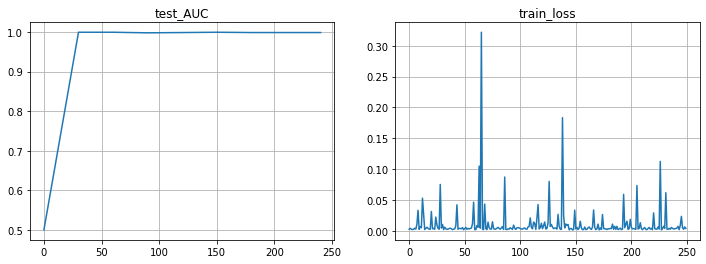

Mean loss=0.007
Last AUC*1000=998.508


In [19]:
train_model(model, optimizer, criterion, X_train, X_test, y_train, y_test, 30,
            32, 500, 'AUC', device, 0.5, 'checkpoints/resnet_classification')

In [4]:
# model.load_state_dict(torch.load("checkpoints/resnet_classification_AUC_0.9992603550295859"))

<All keys matched successfully>

# Get predictions

In [9]:
preds_private = get_predictions(model, PRIVATE_TEST_PATH, 32, device, classification=True)
preds_public = get_predictions(model, PUBLIC_TEST_PATH, 32, device, classification=True)
preds = preds_private + preds_public

In [10]:
np.save('results/resnet_classification_AUC_0.9992603550295859', preds)